Тут загружаем модель из torch.hub

In [2]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia', force_reload=True)

Downloading: "https://github.com/pyannote/pyannote-audio/archive/master.zip" to /home/nikittossii/.cache/torch/hub/master.zip
Using cache found in /home/nikittossii/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /home/nikittossii/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /home/nikittossii/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /home/nikittossii/.cache/torch/hub/pyannote_pyannote-audio_master


Ниже загружаем тестовый файл длительностью 1 минуту(с 39 по 40 минуту от исзодного файла)

In [3]:
Test_file = {"uri":"EN2001a.Mix-Headset", "audio":"test3940.wav"}

Запускаем алгоритм для этого фала

In [4]:
diarization = pipeline(Test_file)

/home/nikittossii/Documents/test/env/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


Получаем вместо диаризации, VAD (скорее всего из за того что файл короткий)

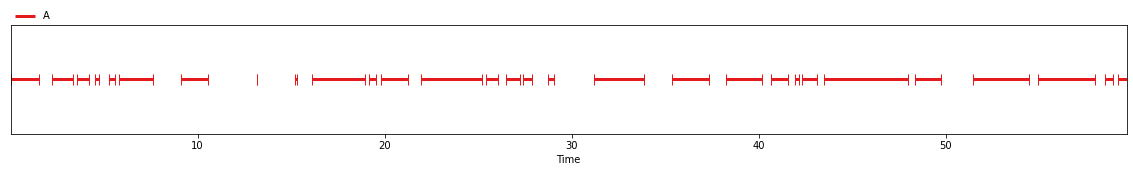

In [5]:
diarization

Повторим алгоритм для более длинного файла(30 минут, с 20 минуты по 50, что бы потом сравнить промежутки с 39-40)

In [6]:
full_file = {"uri":"EN2001a.Mix-Headset", "audio":"test2050.wav"}
diarization_on_full_audio = pipeline(full_file)

/home/nikittossii/Documents/test/env/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


Дальше выведем промежуток с 39 по 40 минуту из большого файла(т.к. начинается с 20 минты то смещаем начало на 19 минут и конец через минуту(1140с и 1200с))
Получаем 2 диаграммы на 1 изображена диаризация из большого файла, на 2 та же диаризация, но из минутного файла.
На 2 диаграмме получили VAD

Не использовал тестовые, заранее размеченные файлы, т.к. они слишком короткие и срабатывают некорректно

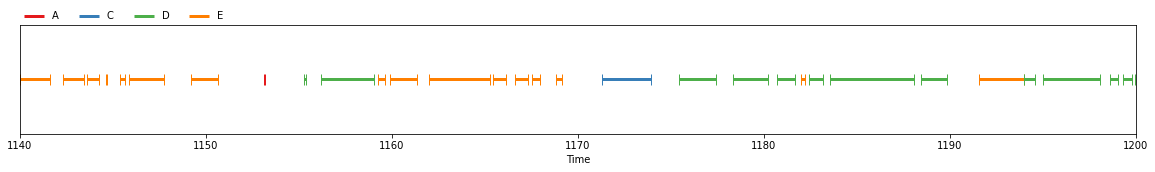

In [24]:
from pyannote.core import Segment, notebook
EXCERPT = Segment(1140, 1200)
notebook.crop = EXCERPT

diarization_on_full_audio

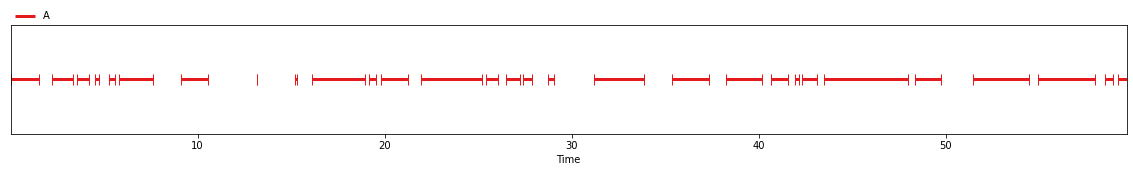

In [17]:
notebook.crop = None
diarization